

```
# This is formatted as code
```

# Breast Cancer Prediction

## Load Data

In [1]:
! chmod 600 kaggle.json && (ls ~/.kaggle 2>/dev/null || mkdir ~/.kaggle) && mv kaggle.json ~/.kaggle/ && echo 'Done'
! kaggle datasets download mohaiminul101/wisconsin-diagnostic-breast-cancer-wdbc
! ls

Done
  0% 0.00/50.9k [00:00<?, ?B/s]
100% 50.9k/50.9k [00:00<00:00, 40.4MB/s]
sample_data  wisconsin-diagnostic-breast-cancer-wdbc.zip


In [2]:
! unzip wisconsin-diagnostic-breast-cancer-wdbc.zip

Archive:  wisconsin-diagnostic-breast-cancer-wdbc.zip
  inflating: data.csv                
  inflating: dataset discription.names  


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn import metrics
import math
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
import warnings
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from sklearn import metrics
%matplotlib inline

cancer = pd.read_csv('data.csv')
# Check if any column has any missing values
cancer.isnull().any()
# We see that Unnamed: 32 has missing data; however, there is no data for that 
# so we can ignore it

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

## Exploratory Data Analysis

In [4]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
cancer.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
65,859283,M,14.780,23.94,97.40,668.3,0.11720,0.14790,0.12670,0.09029,0.1953,0.06654,0.3577,1.2810,2.450,35.24,0.006703,0.023100,0.023150,0.011840,0.01900,0.003224,17.31,33.39,114.60,925.1,0.1648,0.3416,0.30240,0.16140,0.3321,0.08911,NaN
82,8611555,M,25.220,24.91,171.50,1878.0,0.10630,0.26650,0.33390,0.18450,0.1829,0.06782,0.8973,1.4740,7.382,120.00,0.008166,0.056930,0.057300,0.020300,0.01065,0.005893,30.00,33.62,211.70,2562.0,0.1573,0.6076,0.64760,0.28670,0.2355,0.10510,NaN
524,917897,B,9.847,15.68,63.00,293.2,0.09492,0.08419,0.02330,0.02416,0.1387,0.06891,0.2498,1.2160,1.976,15.24,0.008732,0.020420,0.010620,0.006801,0.01824,0.003494,11.24,22.99,74.32,376.5,0.1419,0.2243,0.08434,0.06528,0.2502,0.09209,NaN
541,921386,B,14.470,24.99,95.81,656.4,0.08837,0.12300,0.10090,0.03890,0.1872,0.06341,0.2542,1.0790,2.615,23.11,0.007138,0.046530,0.038290,0.011620,0.02068,0.006111,16.22,31.73,113.50,808.9,0.1340,0.4202,0.40400,0.12050,0.3187,0.10230,NaN
372,9012795,M,21.370,15.10,141.30,1386.0,0.10010,0.15150,0.19320,0.12550,0.1973,0.06183,0.3414,1.3090,2.407,39.06,0.004426,0.026750,0.034370,0.013430,0.01675,0.004367,22.69,21.84,152.10,1535.0,0.1192,0.2840,0.40240,0.19660,0.2730,0.08666,NaN
458,9112594,B,13.000,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,0.05449,0.2621,1.2320,1.657,21.19,0.006054,0.008974,0.005681,0.006336,0.01215,0.001514,14.34,31.88,91.06,628.5,0.1218,0.1093,0.04462,0.05921,0.2306,0.06291,NaN
168,8712766,M,17.470,24.68,116.10,984.6,0.10490,0.16030,0.21590,0.10430,0.1538,0.06365,1.0880,1.4100,7.337,122.30,0.006174,0.036340,0.046440,0.015690,0.01145,0.005120,23.14,32.33,155.30,1660.0,0.1376,0.3830,0.48900,0.17210,0.2160,0.09300,NaN
508,915452,B,16.300,15.70,104.70,819.8,0.09427,0.06712,0.05526,0.04563,0.1711,0.05657,0.2067,0.4706,1.146,20.67,0.007394,0.012030,0.024700,0.014310,0.01344,0.002569,17.32,17.76,109.80,928.2,0.1354,0.1361,0.19470,0.13570,0.2300,0.07230,NaN
564,926424,M,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.028910,0.051980,0.024540,0.01114,0.004239,25.45,26.40,166.10,2027.0,0.1410,0.2113,0.41070,0.22160,0.2060,0.07115,NaN
199,877500,M,14.450,20.22,94.49,642.7,0.09872,0.12060,0.11800,0.05980,0.1950,0.06466,0.2092,0.6509,1.446,19.42,0.004044,0.015970,0.020000,0.007303,0.01522,0.001976,18.33,30.12,117.90,1044.0,0.1552,0.4056,0.49670,0.18380,0.4753,0.10130,NaN


In [6]:

# Group all radius data everything by diagnois
cancer_radius = cancer[['diagnosis', 'radius_mean','radius_se','radius_worst']].groupby('diagnosis')
cancer_radius.describe()

radius_mean                       ... radius_worst                
                count       mean       std  ...          50%      75%    max
diagnosis                                   ...                             
B               357.0  12.146524  1.780512  ...        13.35  14.8000  19.82
M               212.0  17.462830  3.203971  ...        20.59  23.8075  36.04

[2 rows x 24 columns]

In [7]:


cancer_smoothness = cancer[['diagnosis', 'smoothness_mean','smoothness_se','smoothness_worst']].groupby('diagnosis')
cancer_smoothness.describe()

smoothness_mean                      ... smoothness_worst                  
                    count      mean       std  ...              50%       75%     max
diagnosis                                      ...                                   
B                   357.0  0.092478  0.013446  ...          0.12540  0.137600  0.2006
M                   212.0  0.102898  0.012608  ...          0.14345  0.155975  0.2226

[2 rows x 24 columns]

diagnosis
B    357
M    212
dtype: int64


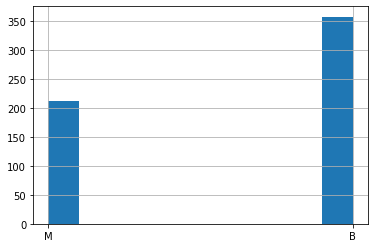

In [8]:
# Create a historgram to compare patient diagnosis
_ = cancer['diagnosis'].hist()
# We observed that there are more benign cancer diagnosis than malignant cancer\
print(cancer.groupby('diagnosis').size())

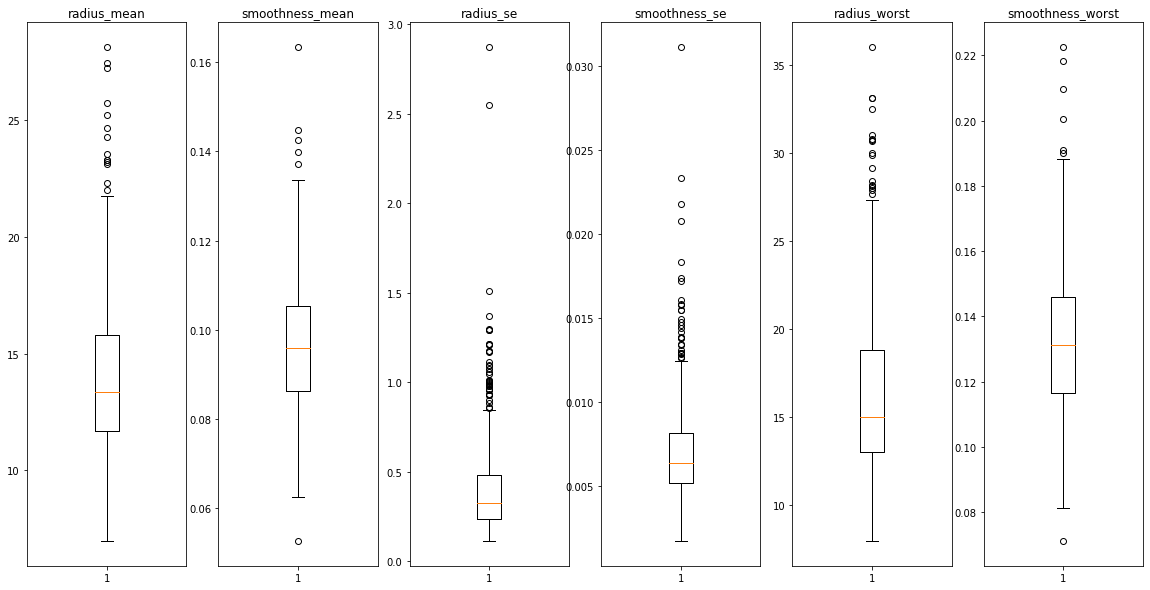

In [9]:
features = [
            'radius_mean',
            'smoothness_mean',
            'radius_se',
            'smoothness_se',
            'radius_worst',
            'smoothness_worst',
            ]

features1 = [
             'radius_mean',
             'smoothness_mean',
             'radius_worst',
             'smoothness_worst',
             ]

comp = [
        'radius_mean',
        'radius_se',
        'radius_worst',
        ]
# Take a look at how our features are distributed
fig, (axs) = plt.subplots(1, 6, figsize=(20, 10))
for i in range(len(features)):
  axs[i].title.set_text(features[i])
  axs[i].boxplot(cancer[features[i]])


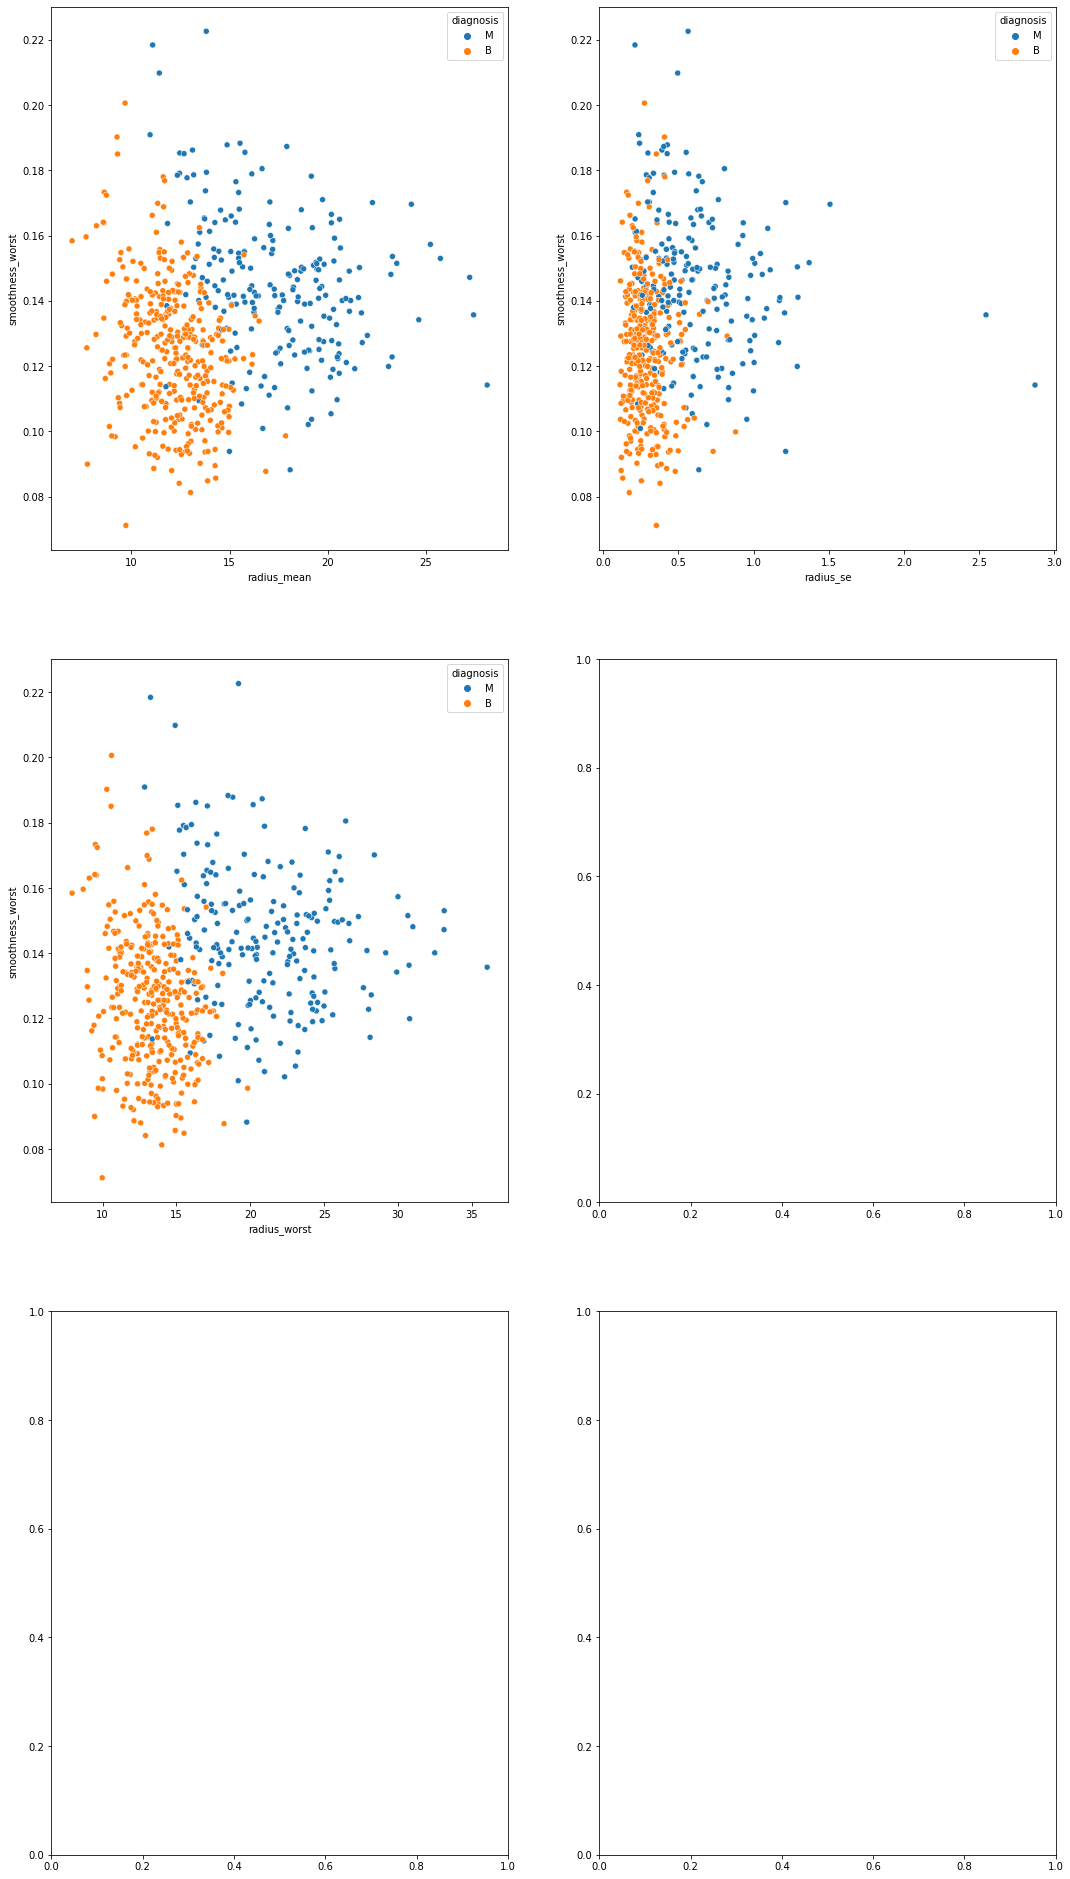

In [10]:
fig, axs = plt.subplots(3, 2, figsize=(18, 34))
y = 0
x = 0
for i in comp:
    sns.scatterplot(data = cancer, x=cancer[i], y=cancer['smoothness_worst'], hue = 'diagnosis', ax = axs[x, y])
    y = y + 1
    if y == 2:
       y = 0
       x = x + 1

In [11]:
diagnosis = list(pd.unique(cancer.diagnosis.values.ravel()))
diagnosis = sorted(diagnosis)
diagnosis
diagnosis_to_id = { v:i for i, v in enumerate(diagnosis)} 
diagnosis_to_id 

{'B': 0, 'M': 1}

In [12]:
cancer['diagnosis'] = pd.Series(np.where(cancer.diagnosis.values == 'M', 1, 0),
          cancer.index)
cancer = cancer.set_index('id')
cancer.sample(n=10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8511133,1,15.340,14.26,102.50,704.4,0.10730,0.21350,0.20770,0.097560,0.2521,0.07032,0.4388,0.7096,3.384,44.910,0.006789,0.053280,0.064460,0.022520,0.03672,0.004394,18.070,19.08,125.10,980.9,0.1390,0.59540,0.63050,0.23930,0.4667,0.09946,NaN
85713702,0,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,0.1563,0.9567,1.094,8.205,0.008968,0.016460,0.015880,0.005917,0.02574,0.002582,8.964,21.96,57.26,242.2,0.1297,0.13570,0.06880,0.02564,0.3105,0.07409,NaN
862965,0,12.180,20.52,77.22,458.7,0.08013,0.04038,0.02383,0.017700,0.1739,0.05677,0.1924,1.5710,1.183,14.680,0.005080,0.006098,0.010690,0.006797,0.01447,0.001532,13.340,32.84,84.58,547.8,0.1123,0.08862,0.11450,0.07431,0.2694,0.06878,NaN
91594602,1,15.050,19.07,97.26,701.9,0.09215,0.08597,0.07486,0.043350,0.1561,0.05915,0.3860,1.1980,2.630,38.490,0.004952,0.016300,0.029670,0.009423,0.01152,0.001718,17.580,28.06,113.80,967.0,0.1246,0.21010,0.28660,0.11200,0.2282,0.06954,NaN
854268,1,14.250,21.72,93.63,633.0,0.09823,0.10980,0.13190,0.055980,0.1885,0.06125,0.2860,1.0190,2.657,24.910,0.005878,0.029950,0.048150,0.011610,0.02028,0.004022,15.890,30.36,116.20,799.6,0.1446,0.42380,0.51860,0.14470,0.3591,0.10140,NaN
869254,0,10.750,14.97,68.26,355.3,0.07793,0.05139,0.02251,0.007875,0.1399,0.05688,0.2525,1.2390,1.806,17.740,0.006547,0.017810,0.020180,0.005612,0.01671,0.002360,11.950,20.72,77.79,441.2,0.1076,0.12230,0.09755,0.03413,0.2300,0.06769,NaN
9112085,0,13.380,30.72,86.34,557.2,0.09245,0.07426,0.02819,0.032640,0.1375,0.06016,0.3408,1.9240,2.287,28.930,0.005841,0.012460,0.007936,0.009128,0.01564,0.002985,15.050,41.61,96.69,705.6,0.1172,0.14210,0.07003,0.07763,0.2196,0.07675,NaN
866083,1,13.610,24.69,87.76,572.6,0.09258,0.07862,0.05285,0.030850,0.1761,0.06130,0.2310,1.0050,1.752,19.830,0.004088,0.011740,0.017960,0.006880,0.01323,0.001465,16.890,35.64,113.20,848.7,0.1471,0.28840,0.37960,0.13290,0.3470,0.07900,NaN
8610404,1,16.070,19.65,104.10,817.7,0.09168,0.08424,0.09769,0.066380,0.1798,0.05391,0.7474,1.0160,5.029,79.250,0.010820,0.022030,0.035000,0.018090,0.01550,0.001948,19.770,24.56,128.80,1223.0,0.1500,0.20450,0.28290,0.15200,0.2650,0.06387,NaN


In [13]:

def plots(columns):
    fig, axs = plt.subplots(3, 3, figsize=(16, 12))
    y = 0
    for col in columns:
        sns.distplot(cancer[col], ax = axs[0, y])
        sns.boxplot(y = col, data = cancer, palette='Accent', ax = axs[1, y])
        sns.scatterplot(x=cancer[col], y=cancer['diagnosis'], ax = axs[2, y])
        y = y+1

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



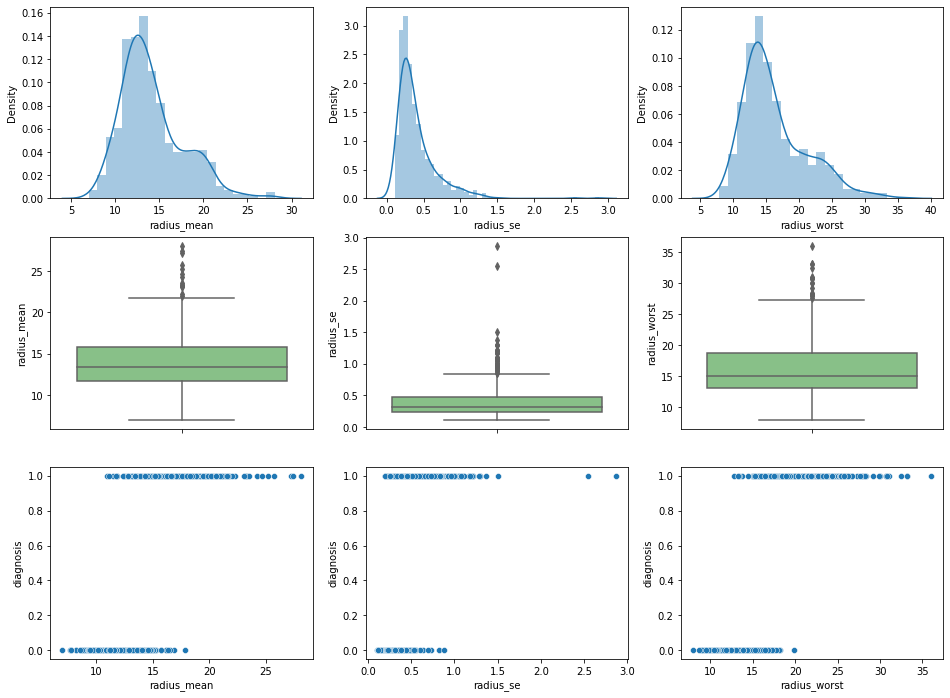

In [14]:
plots(['radius_mean', 'radius_se', 'radius_worst'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



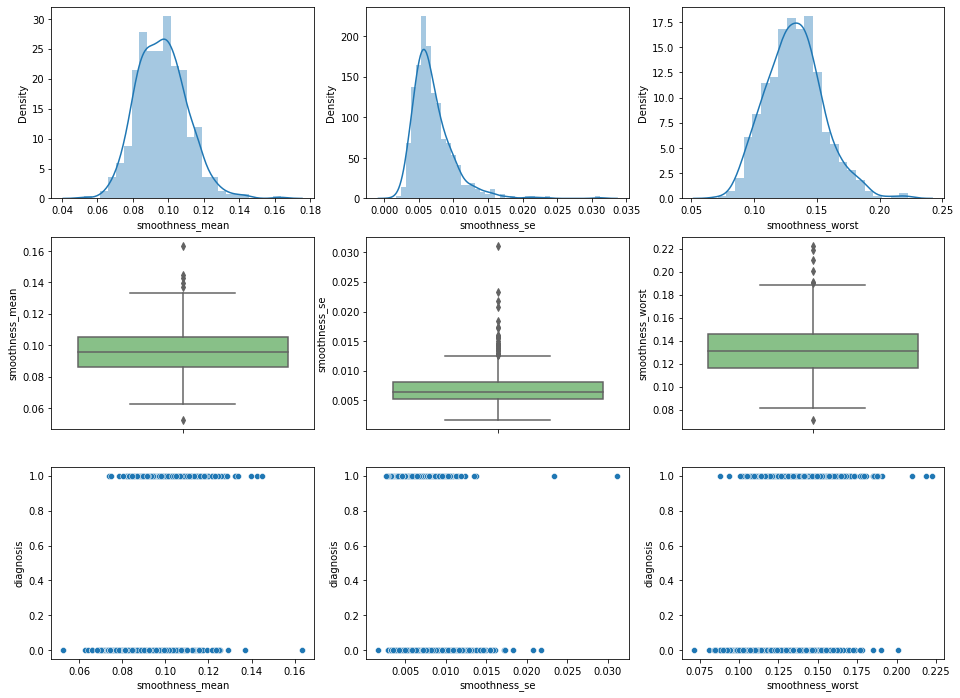

In [15]:
plots(['smoothness_mean', 'smoothness_se', 'smoothness_worst'])



## Model: K Nearest Neighbors

In [16]:
# Split and train the model
X = cancer[features]
y = cancer['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 52)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
y

id
842302      1
842517      1
84300903    1
84348301    1
84358402    1
           ..
926424      1
926682      1
926954      1
927241      1
92751       0
Name: diagnosis, Length: 569, dtype: int64

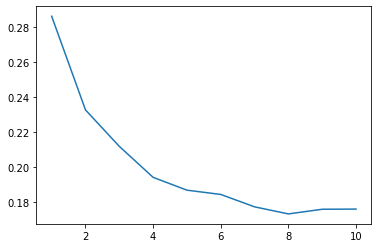

In [17]:
rmse_all=[]
for n_neighbors in range(1,11):
  model = KNeighborsRegressor(n_neighbors= n_neighbors, p = 2, metric = 'euclidean')
  model.fit(X_train,y_train)
  model_pred = model.predict(X_test)
  rmse_all.append(math.sqrt(mean_squared_error(y_test,model_pred)))
  

plt.plot(list (range(1,11)), rmse_all)
plt.show()

In [18]:
rmse_all_p = [i * 100 for i in rmse_all]
per = range(0,10)
st = "Percent Error (K= "
for i in per:
  print(st + (str(i+1)) + "):"+(str(rmse_all_p[i])+ '%'))

Percent Error (K= 1):28.61316917596507%
Percent Error (K= 2):23.25802383081202%
Percent Error (K= 3):21.174113438867455%
Percent Error (K= 4):19.402628386486548%
Percent Error (K= 5):18.6691727641025%
Percent Error (K= 6):18.42569327975222%
Percent Error (K= 7):17.716657075760324%
Percent Error (K= 8):17.312065224553113%
Percent Error (K= 9):17.57848002743937%
Percent Error (K= 10):17.588539596743068%


In [19]:
print("Accuracy:",metrics.accuracy_score(y_test, model_pred.round()))
print("Precision:",metrics.precision_score(y_test, model_pred.round()))
print("Recall:",metrics.recall_score(y_test, model_pred.round()))

Accuracy: 0.9590643274853801
Precision: 0.9830508474576272
Recall: 0.90625


### Visualize Confusion Matrix

In [20]:

cnf_matrix1 = metrics.confusion_matrix(y_test, model_pred.round())
cnf_matrix1

array([[106,   1],
       [  6,  58]])

Text(0.5, 257.44, 'Predicted label')

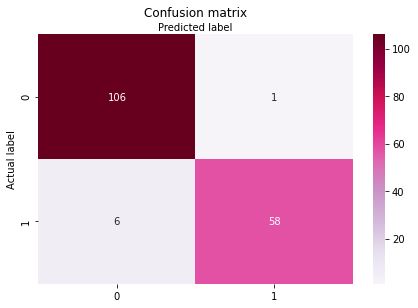

In [21]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix1), annot=True, cmap="PuRd" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Model: Logistic Regression

In [22]:
#Split and train Data
X = cancer[features]
y = cancer['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state = 52)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
#
logreg = LogisticRegression()
#Fit the model to the data
logreg.fit(X_train,y_train)
#
y_pred=logreg.predict(X_test)

### Model Evaluation using Confusion Matrix

In [23]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[102,   5],
       [  8,  56]])

### Visualize Confusion Matrix

In [24]:
import numpy as np


Text(0.5, 257.44, 'Predicted label')

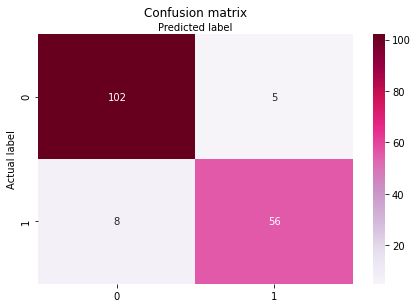

In [25]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="PuRd" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [26]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9239766081871345
Precision: 0.9180327868852459
Recall: 0.875


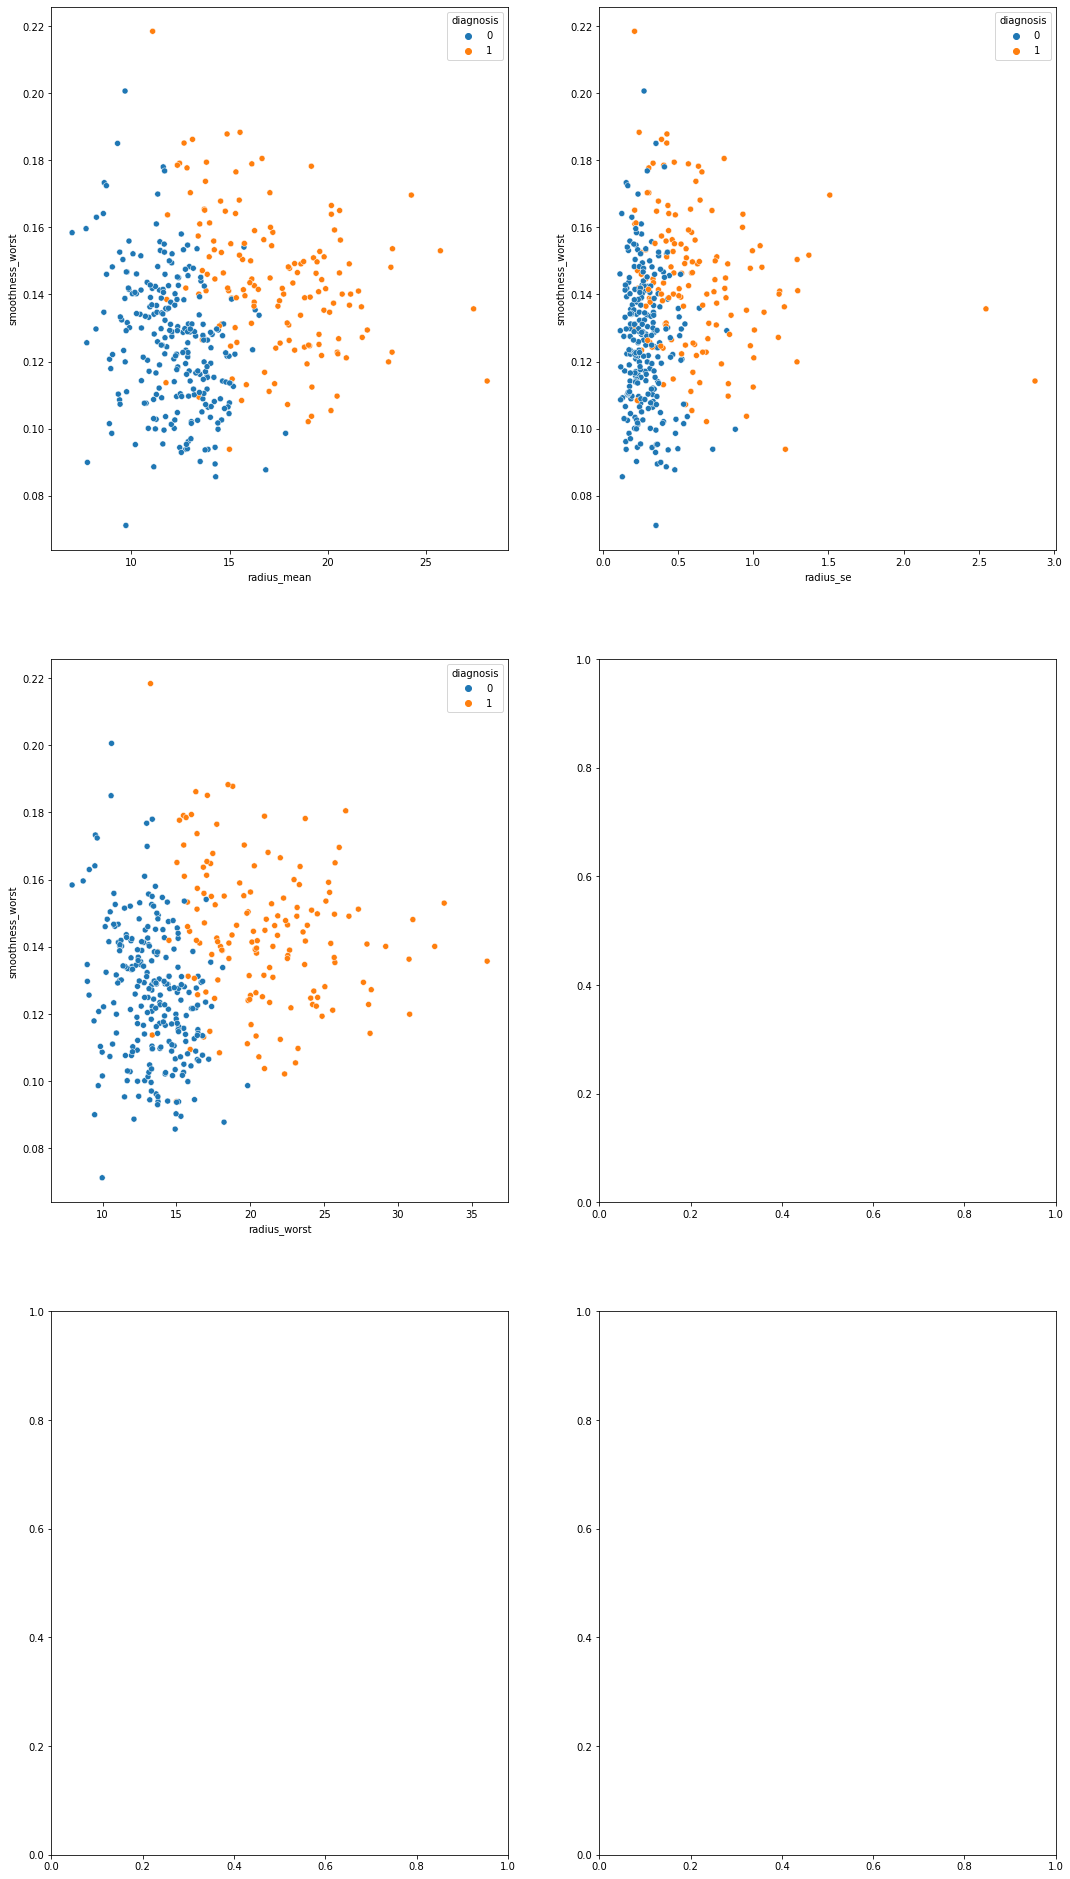

In [27]:
fig, axs = plt.subplots(3, 2, figsize=(18, 34))
y = 0
x = 0
for i in comp:
    sns.scatterplot(data = cancer, x=X_train[i], y=X_train['smoothness_worst'], hue = 'diagnosis', ax = axs[x, y])
    y = y + 1
    if y == 2:
       y = 0
       x = x + 1

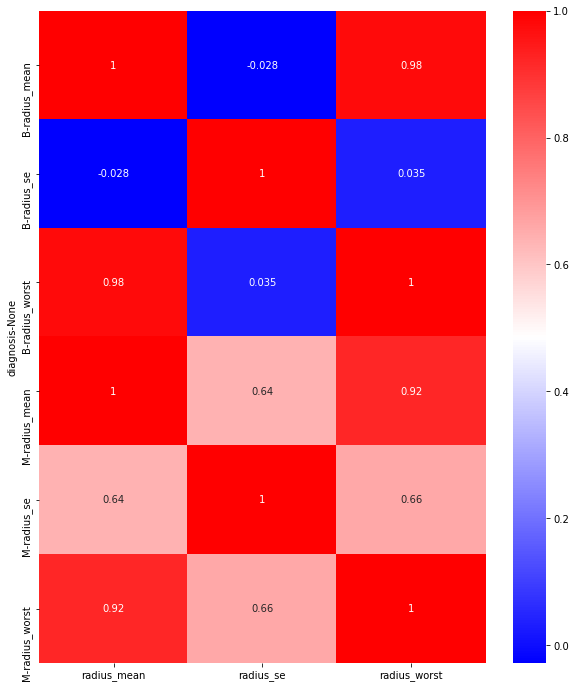

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,12))

_ = sns.heatmap(cancer_radius.corr(), cmap='bwr', annot=True)

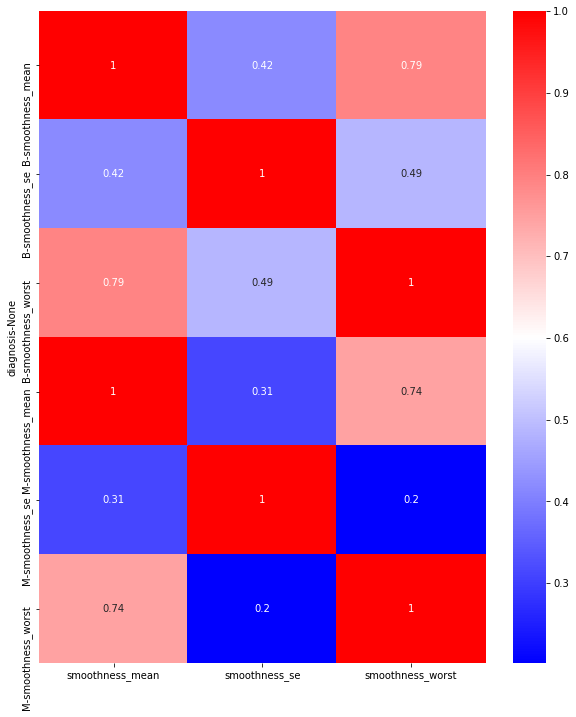

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,12))

_ = sns.heatmap(cancer_smoothness.corr(), cmap='bwr', annot=True)